In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df_default = pd.read_csv('PFTparameters-default.csv',index_col=0).apply(pd.to_numeric, args=('coerce',))
df_min = pd.read_csv('PFTparameters-min.csv',index_col=0).apply(pd.to_numeric, args=('coerce',))
df_max = pd.read_csv('PFTparameters-max.csv',index_col=0).apply(pd.to_numeric, args=('coerce',))

In [3]:
#get the pft names
pfts=xr.open_dataset('/glade/campaign/asp/djk2120/PPEn11/paramfiles/OAAT0000.nc').pftname
pfts=[str(p)[2:-1].strip() for p in pfts.values][0:17]

In [4]:
param_names = df_default.index
param_names

Index(['froot_leaf', 'kmax', 'krmax', 'leaf_long', 'leafcn',
       'lmr_intercept_atkin', 'medlynintercept', 'medlynslope', 'psi50',
       'slatop', 'stem_leaf', 'theta_cj'],
      dtype='object')

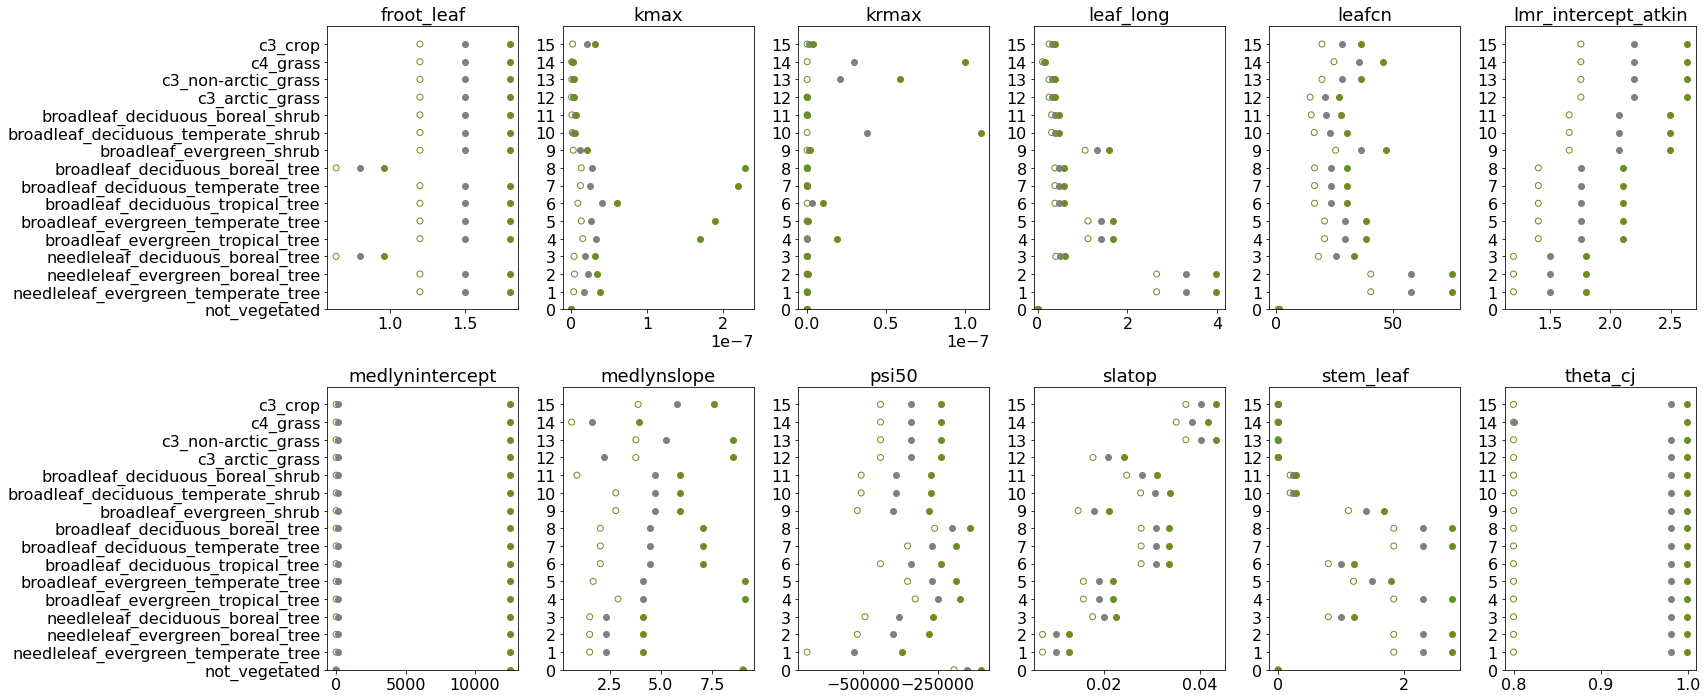

In [11]:
plt.figure(figsize=[24,10])
plt.rcParams.update({'font.size': 16})
for i in range(len(param_names)):
    ax = plt.subplot(2,6,i+1)
    for p in range(len(pfts[0:16])):
        d = df_default.loc[param_names[i],pfts[p]]
        mn = df_min.loc[param_names[i],pfts[p]]
        mx = df_max.loc[param_names[i],pfts[p]]
        ax.scatter(mn,p,color='olivedrab',marker='o',facecolors='none',label='minimum')
        ax.scatter(d,p,color='grey',label='default')
        ax.scatter(mx,p,color='olivedrab',marker='o',label='maximum')
        ax.set_yticks(range(16))
        ax.set_ylim([0,16])
    plt.title(param_names[i],fontsize=18)
    if (i%6 == 0):
        ax.set_yticks(range(16))
        ax.set_yticklabels(pfts[0:16],fontsize=16)
    
plt.tight_layout()
plt.savefig('./figs/PFT_parameter_ranges.png',dpi=200)

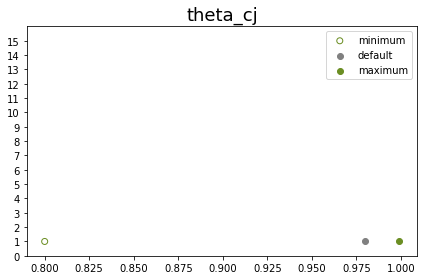

In [9]:

ax = plt.subplot(1,1,1)
p=1
d = df_default.loc[param_names[i],pfts[p]]
mn = df_min.loc[param_names[i],pfts[p]]
mx = df_max.loc[param_names[i],pfts[p]]
ax.scatter(mn,p,color='olivedrab',marker='o',facecolors='none',label='minimum')
ax.scatter(d,p,color='grey',label='default')
ax.scatter(mx,p,color='olivedrab',marker='o',label='maximum')
ax.set_yticks(range(16))
ax.set_ylim([0,16])
plt.title(param_names[i],fontsize=18)
plt.legend()
if (i%6 == 0):
    ax.set_yticks(range(16))
    ax.set_yticklabels(pfts[0:16],fontsize=16)
    
plt.tight_layout()
plt.savefig('./figs/PFT_parameter_ranges_legend.png',dpi=600)

### Universal parameters

In [14]:
df_universal = pd.read_csv('universal_param_ranges.csv',index_col=0).apply(pd.to_numeric, args=('coerce',))

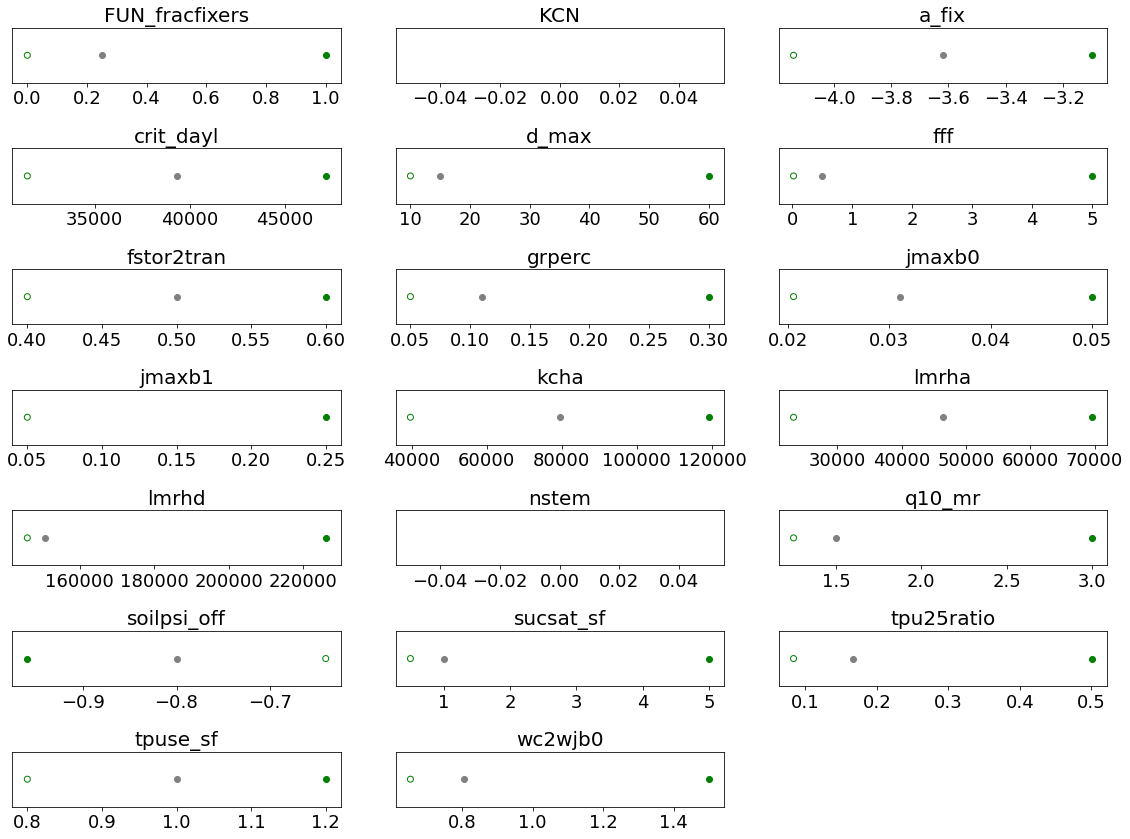

In [16]:
plt.figure(figsize=[16,12])
plt.rcParams.update({'font.size': 18})
for i,param in enumerate(df_universal.index):
    ax = plt.subplot(7,3,i+1)
    
    y = 20-i
    
    ax.scatter(df_universal.loc[param,'min'],y,color='green',facecolors='none',marker='o')
    ax.scatter(df_universal.loc[param,'default'],y,color='grey',marker='o')
    ax.scatter(df_universal.loc[param,'max'],y,color='green',marker='o')

    ax.set_yticks([])
    #ax.set_ylabel(param,rotation=0)
    plt.title(param,fontsize=20)

plt.tight_layout()
plt.savefig('./figs/universal_parameter_ranges.png',dpi=200)